In [1]:
#importamos las librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Limpieza de datos

In [2]:
#cargo el dataset
df = pd.read_csv('american_train_dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})

#eliminamos todas las que tengan output un numero
#df = df[df['Output'].str.isalpha()]
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.710651,0.360695,0.615888,0.346171,0.550860,0.282601,0.534762,0.218653,0.534387,0.164782,...,0.294588,0.770108,0.201429,0.770906,0.183164,0.770106,0.239929,0.771767,0.288998,A
1,0.405695,0.647552,0.319726,0.581067,0.271913,0.498254,0.273852,0.422791,0.295577,0.365717,...,0.546457,0.500247,0.503992,0.491320,0.457143,0.470195,0.505762,0.454539,0.552650,A
2,0.316689,0.521771,0.232337,0.467040,0.177462,0.386787,0.160568,0.317913,0.168354,0.258710,...,0.429866,0.397665,0.363233,0.370970,0.322016,0.361503,0.368900,0.359597,0.413843,A
3,0.548107,0.650610,0.476015,0.570932,0.428442,0.476566,0.431988,0.391317,0.477113,0.336531,...,0.536890,0.672368,0.509499,0.671439,0.455122,0.642028,0.502216,0.620230,0.548037,A
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SPACE
83995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SPACE
83996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SPACE
83997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SPACE


In [3]:
# tamaño del dataset sin limpiar 
df.shape

(83999, 43)

In [4]:
# removemos los datos nulos del dataset
all_null_values = df[df.iloc[:, 0] == 0]
print("Cantidad de valores nulos: ", len(all_null_values.index))

Cantidad de valores nulos:  24290


In [5]:
# eliminamos los datos nulos
df = df.drop(all_null_values.index)
df.shape

(59709, 43)

## Normalización de los datos

In [6]:
X = df.iloc[:, :-1]
print("Tamaño de las características: ", X.shape)
Y = df.iloc[:, -1]
print("Tamaño de las etiquetas: ", Y.shape)

Tamaño de las características:  (59709, 42)
Tamaño de las etiquetas:  (59709,)


## Separación de los datos

In [7]:
# dividimos el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Elaboración del modelo

In [8]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [9]:
# precision del entrenamiento
print ("Precision del entrenamiento: ", svm.score(x_train, y_train))

Precision del entrenamiento:  0.9973203257479013


In [10]:
y_pred = svm.predict(x_test)

In [11]:
# precision del test
print( "Precisión del test: ", accuracy_score(y_test, y_pred))

Precisión del test:  0.9960643108357059


## Visualizamos la matriz de confusión

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [13]:
f1, recall, precision

(0.9960643108357059, 0.9960643108357059, 0.9960643108357059)

<AxesSubplot: title={'center': 'Matriz de confusión American Sign Language'}>

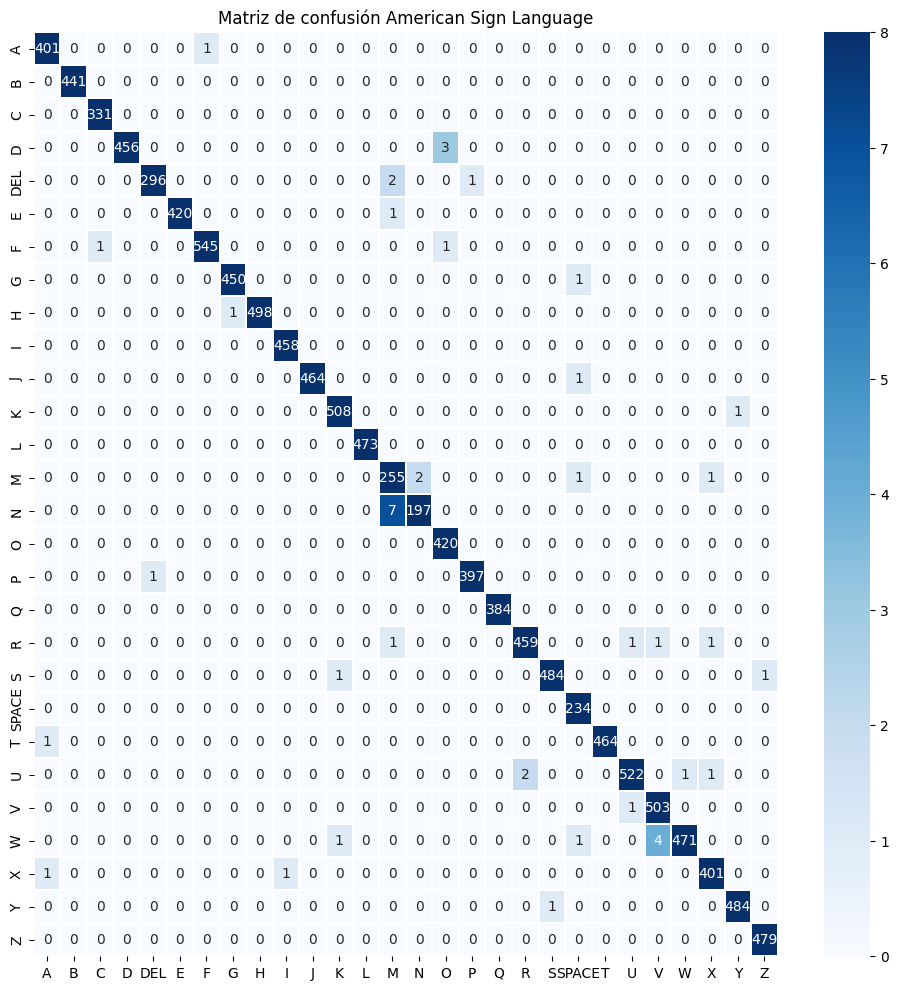

In [13]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title('Matriz de confusión American Sign Language')

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [14]:
# Guardamos la matriz de confusión
maping.figure.savefig("output.png")

In [16]:
# Guardamos el modelo
joblib.dump(svm, 'model.pkl')

['model.pkl']